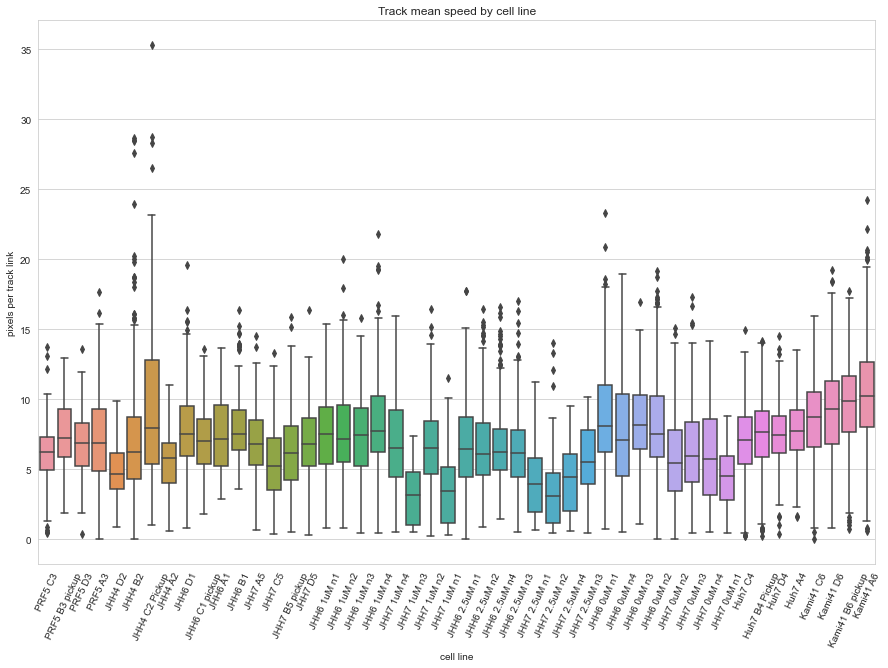

In [11]:
# preliminary analysis using master_df_0.csv
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

master_df = pd.read_csv('master_df_0.csv')

# column names listed for reference
columns = ['IMAGE_SERIES', 'Label', 'TRACK_ID', 'NUMBER_SPOTS', 'NUMBER_GAPS',
           'LONGEST_GAP', 'NUMBER_SPLITS', 'NUMBER_MERGES', 'NUMBER_COMPLEX',
           'TRACK_DURATION', 'TRACK_START', 'TRACK_STOP', 'TRACK_DISPLACEMENT',
           'TRACK_INDEX', 'TRACK_X_LOCATION', 'TRACK_Y_LOCATION',
           'TRACK_Z_LOCATION', 'TRACK_MEAN_SPEED', 'TRACK_MAX_SPEED',
           'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED', 'TRACK_STD_SPEED',
           'TRACK_MEAN_QUALITY', 'TRACK_MAX_QUALITY', 'TRACK_MIN_QUALITY',
           'TRACK_MEDIAN_QUALITY', 'TRACK_STD_QUALITY']

# create boxplot for all cell lines and conditions
sns.set_style('whitegrid')
sns.boxplot(x='IMAGE_SERIES', y='TRACK_MEAN_SPEED', data=master_df)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('Track mean speed by cell line')
plt.ylabel('pixels per track link')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (27,10)
plt.show()

In [2]:
master_df.IMAGE_SERIES.unique()

array(['PRF5 C3', 'PRF5 B3 pickup', 'PRF5 D3', 'PRF5 A3', 'JHH4 D2',
       'JHH4 B2', 'JHH4 C2 Pickup', 'JHH4 A2', 'JHH6 D1',
       'JHH6 C1 pickup', 'JHH6 A1', 'JHH6 B1', 'JHH7 A5', 'JHH7 C5',
       'JHH7 B5 pickup', 'JHH7 D5', 'JHH6 1uM n1', 'JHH6 1uM n2',
       'JHH6 1uM n3', 'JHH6 1uM n4', 'JHH7 1uM n4', 'JHH7 1uM n3',
       'JHH7 1uM n2', 'JHH7 1uM n1', 'JHH6 2.5uM n1', 'JHH6 2.5uM n2',
       'JHH6 2.5uM n4', 'JHH6 2.5uM n3', 'JHH7 2.5uM n1', 'JHH7 2.5uM n2',
       'JHH7 2.5uM n4', 'JHH7 2.5uM n3', 'JHH6 0uM n1', 'JHH6 0uM n4',
       'JHH6 0uM n3', 'JHH6 0uM n2', 'JHH7 0uM n2', 'JHH7 0uM n3',
       'JHH7 0uM n4', 'JHH7 0uM n1', 'Huh7 C4', 'Huh7 B4 Pickup',
       'Huh7 D4', 'Huh7 A4', 'Kami41 C6', 'Kami41 D6', 'Kami41 B6 pickup',
       'Kami41 A6'], dtype=object)

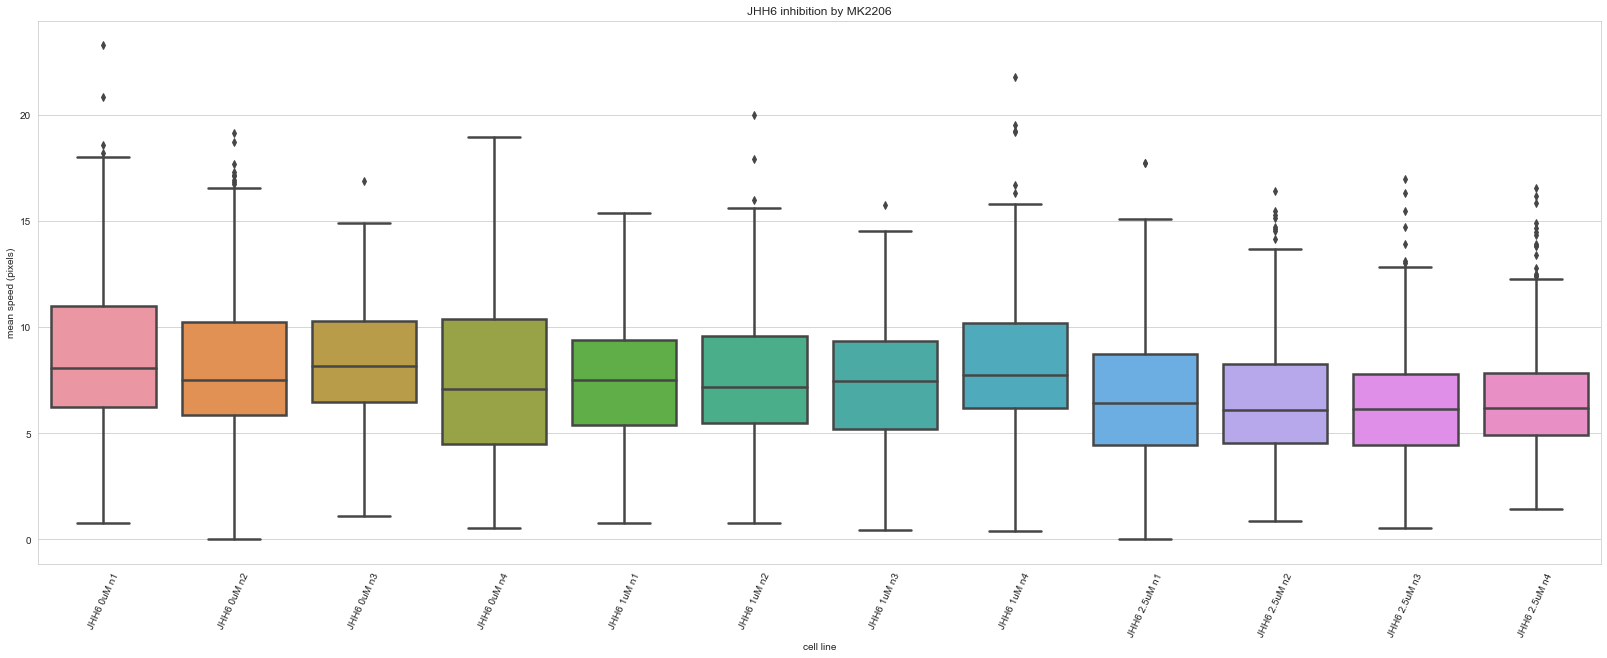

In [3]:
# create boxplot comparing JHH6 cell lines under different treament conditions
# here cell lines are grouped by treatment class

JHH6_treatment_order = ['JHH6 0uM n1', 'JHH6 0uM n2', 'JHH6 0uM n3', 'JHH6 0uM n4',
                        'JHH6 1uM n1', 'JHH6 1uM n2', 'JHH6 1uM n3', 'JHH6 1uM n4',
                        'JHH6 2.5uM n1', 'JHH6 2.5uM n2', 'JHH6 2.5uM n3', 'JHH6 2.5uM n4']

JHH6_treatment_df = master_df[master_df.IMAGE_SERIES.isin(JHH6_treatment_order)]

sns.set_style('whitegrid')
sns.boxplot(x='IMAGE_SERIES', y='TRACK_MEAN_SPEED', 
            data=JHH6_treatment_df, order=JHH6_treatment_order, 
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH6 inhibition by MK2206')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

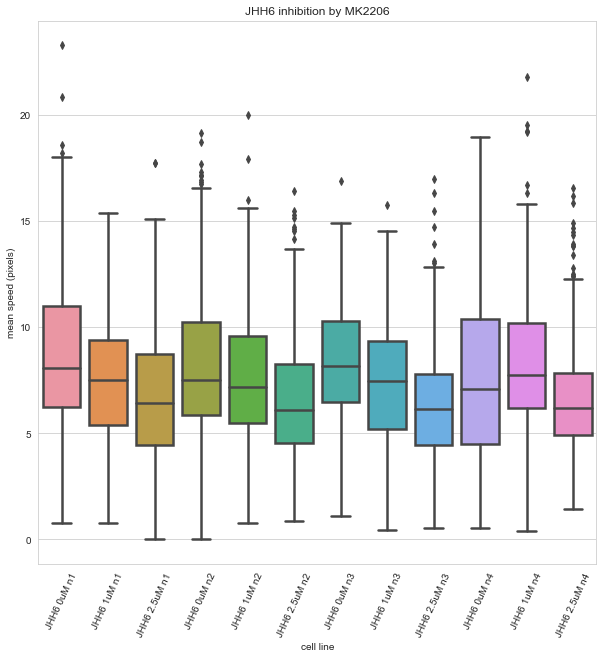

In [4]:
# create boxplot comparing JHH6 cell lines under different treament conditions
# here cell lines are grouped by plate wells (so that contrasting treatment categories for each well
# are shown side by side)

JHH6_treatment_order = ['JHH6 0uM n1', 'JHH6 1uM n1', 'JHH6 2.5uM n1',
                        'JHH6 0uM n2', 'JHH6 1uM n2', 'JHH6 2.5uM n2',
                        'JHH6 0uM n3', 'JHH6 1uM n3', 'JHH6 2.5uM n3',
                        'JHH6 0uM n4', 'JHH6 1uM n4', 'JHH6 2.5uM n4']

JHH6_treatment_df = master_df[master_df.IMAGE_SERIES.isin(JHH6_treatment_order)]

sns.set_style('whitegrid')
sns.boxplot(x='IMAGE_SERIES', y='TRACK_MEAN_SPEED', data=JHH6_treatment_df, order=JHH6_treatment_order,
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH6 inhibition by MK2206')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

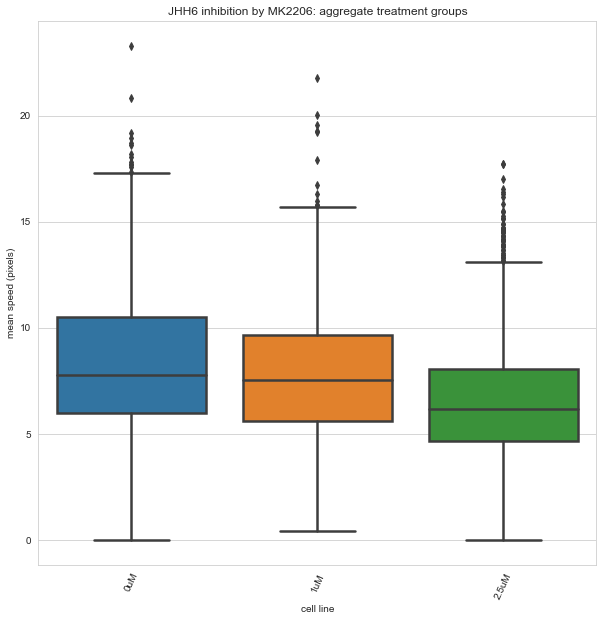

In [5]:
# create boxplot comparing JHH6 cell lines under different treament conditions
# here experimental replicates are combined into aggregate datasets
# i.e. JHH6 0uM n1, n2, n3, and n4 are plotted as a single dataset, etc.

# we want to create 3 separate categories:
# JHH6 0uM, JHH6 1uM, JHH6 2.5uM

JHH6_0uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH6 0uM n1') | 
                         (master_df['IMAGE_SERIES'] == 'JHH6 0uM n2') | 
                         (master_df['IMAGE_SERIES'] == 'JHH6 0uM n3') |
                         (master_df['IMAGE_SERIES'] == 'JHH6 0uM n4')]
# add column to specify treatment group
JHH6_0uM.insert(1, 'treatment', '0uM')

JHH6_1uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH6 1uM n1') | 
                         (master_df['IMAGE_SERIES'] == 'JHH6 1uM n2') | 
                         (master_df['IMAGE_SERIES'] == 'JHH6 1uM n3') |
                         (master_df['IMAGE_SERIES'] == 'JHH6 1uM n4')]
JHH6_1uM.insert(1, 'treatment', '1uM')

JHH6_2o5uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH6 2.5uM n1') | 
                           (master_df['IMAGE_SERIES'] == 'JHH6 2.5uM n2') | 
                           (master_df['IMAGE_SERIES'] == 'JHH6 2.5uM n3') |
                           (master_df['IMAGE_SERIES'] == 'JHH6 2.5uM n4')]
JHH6_2o5uM.insert(1, 'treatment', '2.5uM')

frames = [JHH6_0uM, JHH6_1uM, JHH6_2o5uM]
JHH6_all = pd.concat(frames)
JHH6_all

sns.set_style('whitegrid')
sns.boxplot(x='treatment', y='TRACK_MEAN_SPEED', data=JHH6_all,
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH6 inhibition by MK2206: aggregate treatment groups')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

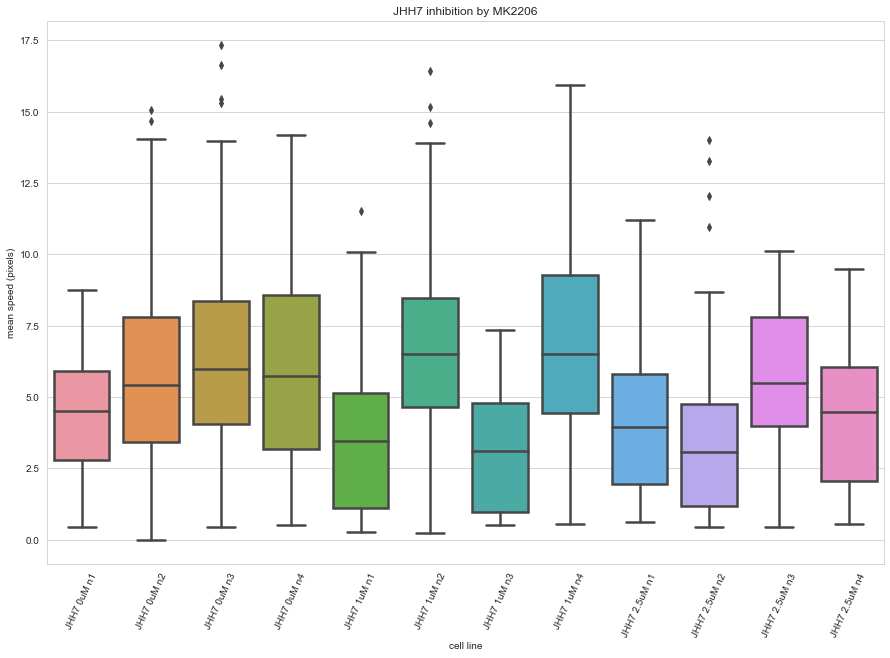

In [6]:
# create boxplot comparing JHH7 cell lines under different treament conditions
# here cell lines are grouped by treatment class

JHH7_treatment_order = ['JHH7 0uM n1', 'JHH7 0uM n2', 'JHH7 0uM n3', 'JHH7 0uM n4',
                        'JHH7 1uM n1', 'JHH7 1uM n2', 'JHH7 1uM n3', 'JHH7 1uM n4',
                        'JHH7 2.5uM n1', 'JHH7 2.5uM n2', 'JHH7 2.5uM n3', 'JHH7 2.5uM n4']
JHH7_treatment_df = master_df[master_df.IMAGE_SERIES.isin(JHH7_treatment_order)]

sns.set_style('whitegrid')
sns.boxplot(x='IMAGE_SERIES', y='TRACK_MEAN_SPEED', data=JHH7_treatment_df, order=JHH7_treatment_order, 
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH7 inhibition by MK2206')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

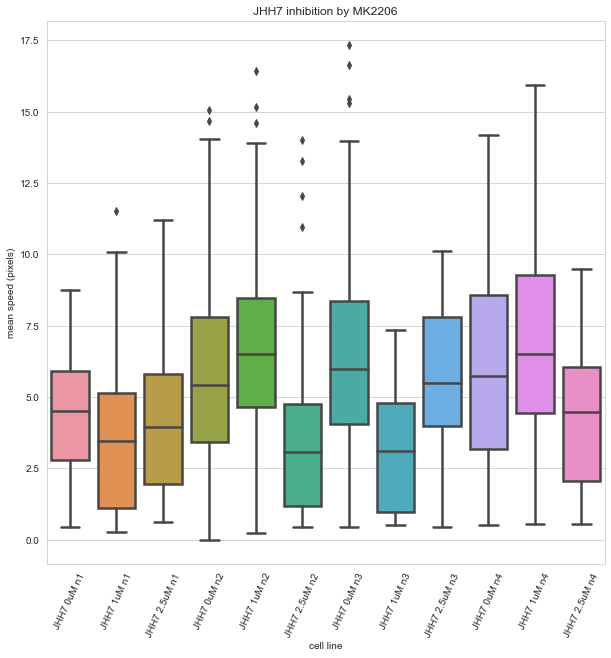

In [7]:
# create boxplot comparing JHH6 cell lines under different treament conditions
# here cell lines are grouped by plate wells (so that contrasting treatment categories for each well
# are shown side by side)

JHH7_treatment_order = ['JHH7 0uM n1', 'JHH7 1uM n1', 'JHH7 2.5uM n1',
                        'JHH7 0uM n2', 'JHH7 1uM n2', 'JHH7 2.5uM n2',
                        'JHH7 0uM n3', 'JHH7 1uM n3', 'JHH7 2.5uM n3',
                        'JHH7 0uM n4', 'JHH7 1uM n4', 'JHH7 2.5uM n4']
JHH7_treatment_df = master_df[master_df.IMAGE_SERIES.isin(JHH7_treatment_order)]

sns.set_style('whitegrid')
sns.boxplot(x='IMAGE_SERIES', y='TRACK_MEAN_SPEED', data=JHH7_treatment_df, order=JHH7_treatment_order, 
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH7 inhibition by MK2206')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

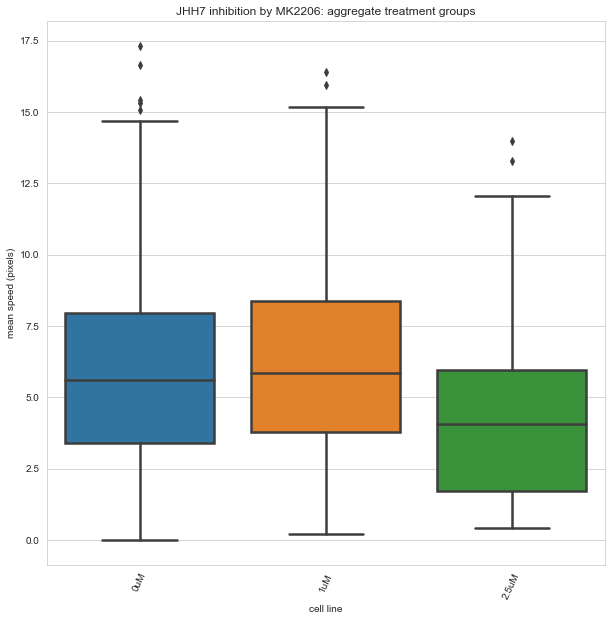

In [8]:
# create boxplot comparing JHH6 cell lines under different treament conditions
# here experimental replicates are combined into aggregate datasets
# i.e. JHH7 0uM n1, n2, n3, and n4 are plotted as a single dataset, etc.

# we want to create 3 separate categories:
# JHH7 0uM, JHH7 1uM, JHH7 2.5uM

JHH7_0uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH7 0uM n1') | 
                         (master_df['IMAGE_SERIES'] == 'JHH7 0uM n2') | 
                         (master_df['IMAGE_SERIES'] == 'JHH7 0uM n3') |
                         (master_df['IMAGE_SERIES'] == 'JHH7 0uM n4')]
# add column to specify treatment group
JHH7_0uM.insert(1, 'treatment', '0uM')

JHH7_1uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH7 1uM n1') | 
                         (master_df['IMAGE_SERIES'] == 'JHH7 1uM n2') | 
                         (master_df['IMAGE_SERIES'] == 'JHH7 1uM n3') |
                         (master_df['IMAGE_SERIES'] == 'JHH7 1uM n4')]
JHH7_1uM.insert(1, 'treatment', '1uM')

JHH7_2o5uM = master_df.loc[(master_df['IMAGE_SERIES'] == 'JHH7 2.5uM n1') | 
                           (master_df['IMAGE_SERIES'] == 'JHH7 2.5uM n2') | 
                           (master_df['IMAGE_SERIES'] == 'JHH7 2.5uM n3') |
                           (master_df['IMAGE_SERIES'] == 'JHH7 2.5uM n4')]
JHH7_2o5uM.insert(1, 'treatment', '2.5uM')

frames = [JHH7_0uM, JHH7_1uM, JHH7_2o5uM]
JHH7_all = pd.concat(frames)
JHH7_all

sns.set_style('whitegrid')
sns.boxplot(x='treatment', y='TRACK_MEAN_SPEED', data=JHH7_all,
            linewidth=2.5)
plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH7 inhibition by MK2206: aggregate treatment groups')
plt.ylabel('mean speed (pixels)')
plt.xlabel('cell line')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [33]:
# practice finding change in cell count

target_series = 'PRF5 C3'
PRF5_C3 = master_df.loc[master_df['IMAGE_SERIES'] == target_series]

# calculate cell count at frame 0
start_count = len(PRF5_C3.loc[PRF5_C3['TRACK_START'] == 0])
print(start_count)

# calculate cell count at final frame
final_frame = PRF5_C3['TRACK_STOP'].max()
stop_count = len(PRF5_C3.loc[PRF5_C3['TRACK_STOP'] == final_frame])
print(stop_count)

cell_count_change = stop_count - start_count
print('change : ' + str(cell_count_change))


# example of how to sum a column based on a condition
# df.loc[df['team'] == 'A', 'points'].sum()


40
57
change : 17


In [53]:
# create function to calculate cell count change for each image series
# rerun this cell to clear the cell count changes dictionary

cell_count_changes = {}

def calc_cell_change(target):
    target_series = target
    series_df = master_df.loc[master_df['IMAGE_SERIES'] == target_series]
    
    # calculate cell count at frame 0
    start_count = len(series_df.loc[series_df['TRACK_START'] == 0])
    #print(start_count)
    
    # calculate cell count at final frame
    final_frame = series_df['TRACK_STOP'].max()
    stop_count = len(series_df.loc[series_df['TRACK_STOP'] == final_frame])
    #print(stop_count)
    
    cell_count_change = stop_count - start_count
    #print('change : ' + str(cell_count_change))
    
    cell_count_changes[target_series] = cell_count_change
    

# create list of all image series
JHH6_image_series_list = ['JHH6 0uM n1', 'JHH6 1uM n1', 'JHH6 2.5uM n1',
                        'JHH6 0uM n2', 'JHH6 1uM n2', 'JHH6 2.5uM n2',
                        'JHH6 0uM n3', 'JHH6 1uM n3', 'JHH6 2.5uM n3',
                        'JHH6 0uM n4', 'JHH6 1uM n4', 'JHH6 2.5uM n4']

all_image_series_list = ['PRF5 C3', 'PRF5 B3 pickup', 'PRF5 D3', 'PRF5 A3', 'JHH4 D2',
       'JHH4 B2', 'JHH4 C2 Pickup', 'JHH4 A2', 'JHH6 D1',
       'JHH6 C1 pickup', 'JHH6 A1', 'JHH6 B1', 'JHH7 A5', 'JHH7 C5',
       'JHH7 B5 pickup', 'JHH7 D5', 'JHH6 1uM n1', 'JHH6 1uM n2',
       'JHH6 1uM n3', 'JHH6 1uM n4', 'JHH7 1uM n4', 'JHH7 1uM n3',
       'JHH7 1uM n2', 'JHH7 1uM n1', 'JHH6 2.5uM n1', 'JHH6 2.5uM n2',
       'JHH6 2.5uM n4', 'JHH6 2.5uM n3', 'JHH7 2.5uM n1', 'JHH7 2.5uM n2',
       'JHH7 2.5uM n4', 'JHH7 2.5uM n3', 'JHH6 0uM n1', 'JHH6 0uM n4',
       'JHH6 0uM n3', 'JHH6 0uM n2', 'JHH7 0uM n2', 'JHH7 0uM n3',
       'JHH7 0uM n4', 'JHH7 0uM n1', 'Huh7 C4', 'Huh7 B4 Pickup',
       'Huh7 D4', 'Huh7 A4', 'Kami41 C6', 'Kami41 D6', 'Kami41 B6 pickup',
       'Kami41 A6']

for image_series in all_image_series_list:
    calc_cell_change(image_series)

print(cell_count_changes)

{'PRF5 C3': 17, 'PRF5 B3 pickup': 3, 'PRF5 D3': 18, 'PRF5 A3': 51, 'JHH4 D2': 29, 'JHH4 B2': 5, 'JHH4 C2 Pickup': -4, 'JHH4 A2': 4, 'JHH6 D1': 9, 'JHH6 C1 pickup': 24, 'JHH6 A1': 15, 'JHH6 B1': 15, 'JHH7 A5': 82, 'JHH7 C5': 11, 'JHH7 B5 pickup': 41, 'JHH7 D5': 18, 'JHH6 1uM n1': 23, 'JHH6 1uM n2': 45, 'JHH6 1uM n3': 38, 'JHH6 1uM n4': 49, 'JHH7 1uM n4': 51, 'JHH7 1uM n3': 22, 'JHH7 1uM n2': 42, 'JHH7 1uM n1': 30, 'JHH6 2.5uM n1': 69, 'JHH6 2.5uM n2': 126, 'JHH6 2.5uM n4': 158, 'JHH6 2.5uM n3': 108, 'JHH7 2.5uM n1': 21, 'JHH7 2.5uM n2': 45, 'JHH7 2.5uM n4': 24, 'JHH7 2.5uM n3': 18, 'JHH6 0uM n1': 67, 'JHH6 0uM n4': 37, 'JHH6 0uM n3': 21, 'JHH6 0uM n2': 57, 'JHH7 0uM n2': 31, 'JHH7 0uM n3': 31, 'JHH7 0uM n4': 35, 'JHH7 0uM n1': 13, 'Huh7 C4': 10, 'Huh7 B4 Pickup': 0, 'Huh7 D4': 33, 'Huh7 A4': 28, 'Kami41 C6': 11, 'Kami41 D6': 22, 'Kami41 B6 pickup': 24, 'Kami41 A6': 79}


<BarContainer object of 12 artists>

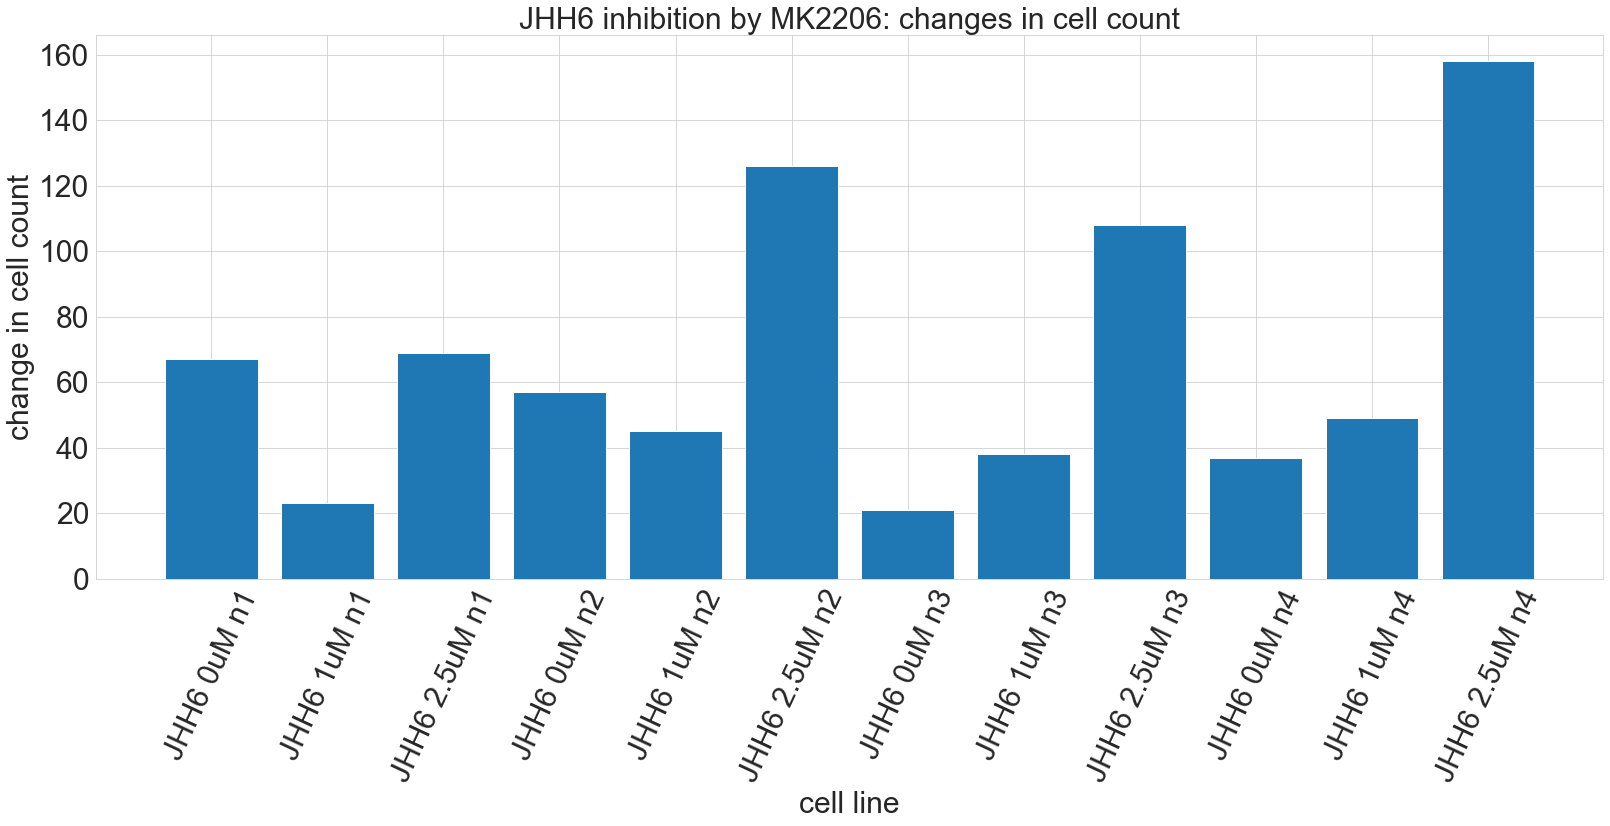

In [52]:
# visualize cell count changes for each JHH6 treated cell line
# plot values from cell_count_changes dictionary

keys = cell_count_changes.keys()
values = cell_count_changes.values()

plt.xticks(rotation=65)
axes = plt.gca()
plt.title('JHH6 inhibition by MK2206: changes in cell count')
plt.ylabel('change in cell count')
plt.xlabel('cell line')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=30)
plt.bar(keys, values)

<BarContainer object of 48 artists>

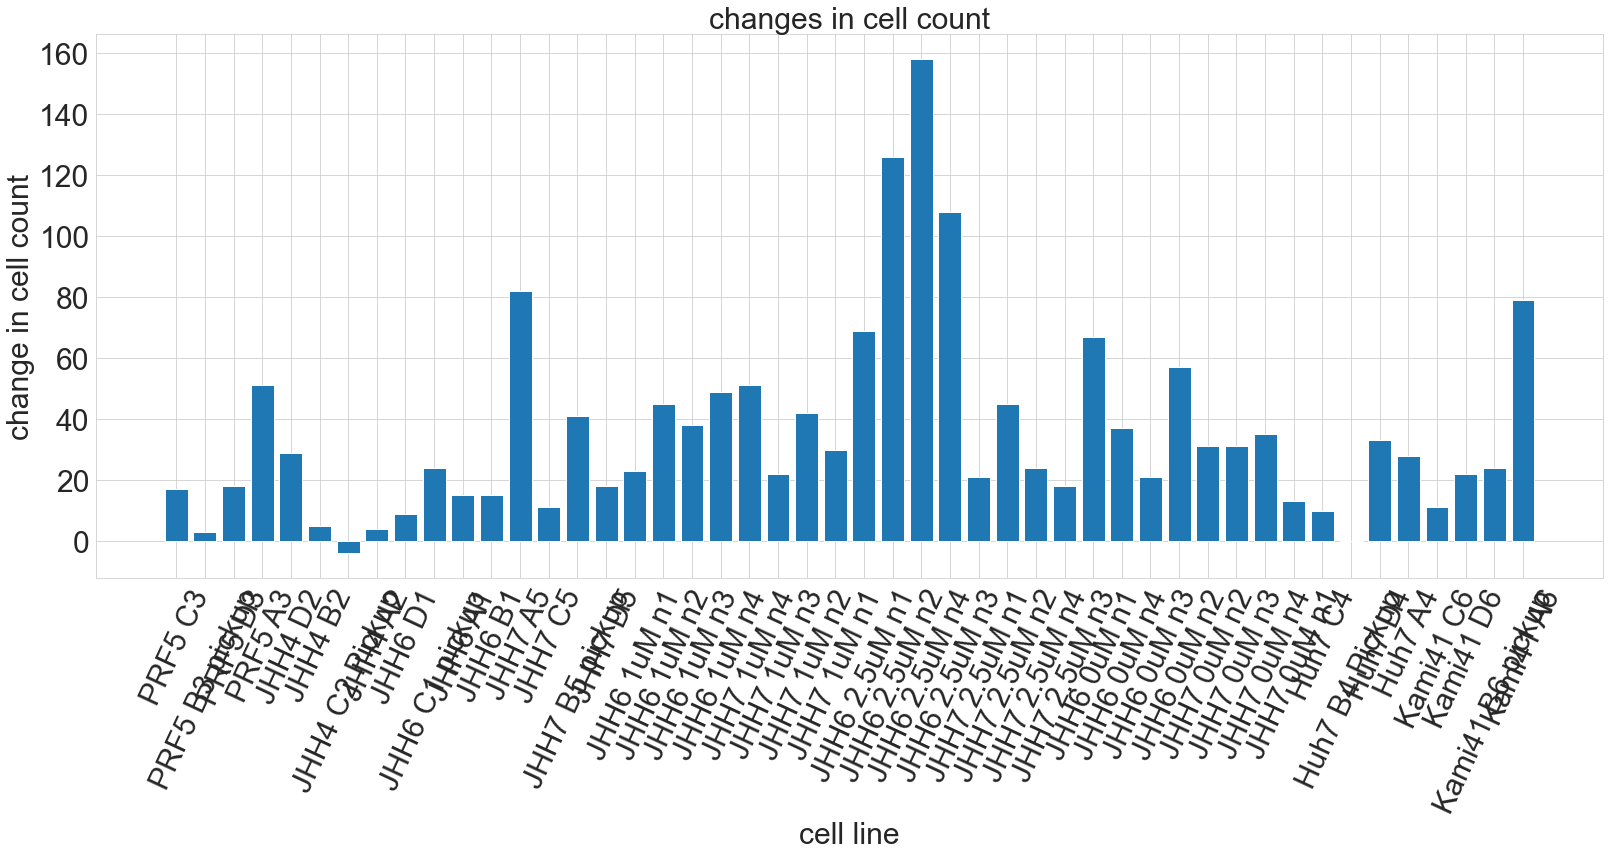

In [55]:
# visualize cell count changes for each all cell lines
# plot values from cell_count_changes dictionary

keys = cell_count_changes.keys()
values = cell_count_changes.values()

plt.xticks(rotation=65)
axes = plt.gca()
plt.title('changes in cell count')
plt.ylabel('change in cell count')
plt.xlabel('cell line')
# plt.rc('xtick', labelsize=30) 
# plt.rc('ytick', labelsize=30)
# plt.rc('font', size=30)
plt.rcParams["figure.figsize"] = (15,15)
plt.bar(keys, values)